In [2]:
pip install numpy_financial

In [3]:
import numpy_financial as npf
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import pandas as pd

# Load the Excel file
excel_data = pd.read_excel('/content/NPV & IRR.xlsx')

# Display the first few rows to understand its structure
display(excel_data.head())

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Year,Cashflow,PV Formula,PV,NaN,NaN,NaN
2,0,-1000,-1000,-1000,NaN,0.11,0=-1000+300/(1+0.11)+400/(1+0.11)^2)+500/(1+0....
3,1,300,270.27027,272.7,NaN,NaN,NaN
4,2,680,551.903255,330.6,NaN,NaN,NaN


Extracted Cash Flows: [-1000.0, 300.0, 680.0, 500.0]
Extracted Discount Rate: 0.1

NPV at 10% (from Excel): £331.40
IRR (from Excel): 20.68%


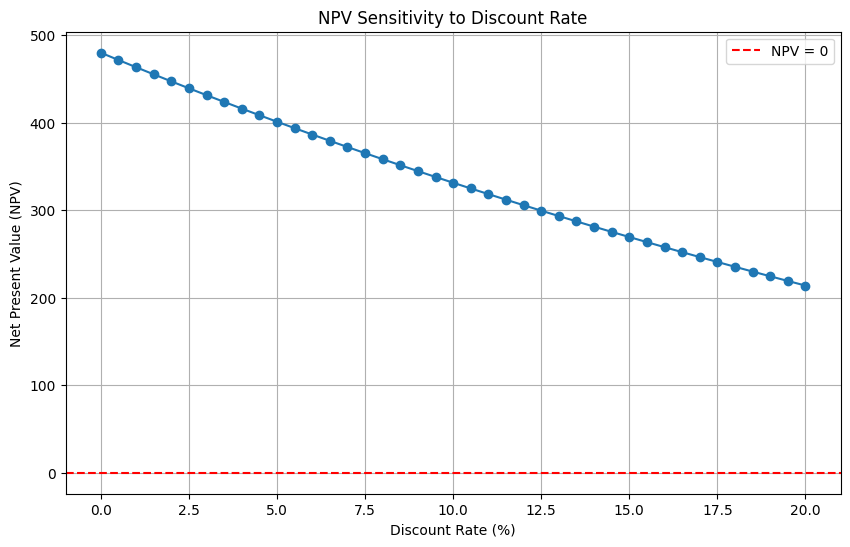

In [9]:
# Def function for NPV sensitivity plot
def plot_sensitivity(cash_flows_list):
    numeric_series = pd.to_numeric(pd.Series(cash_flows_list), errors='coerce')
    numeric_cash_flows = numeric_series.dropna().to_numpy()

    if len(numeric_cash_flows) < 2:
        print("Not enough cash flows to plot sensitivity.")
        return

    # Define discount rates range
    discount_rates_range = np.arange(0.0, 0.205, 0.005)

    npv_values = []
    initial_investment = numeric_cash_flows[0]
    future_cash_flows = numeric_cash_flows[1:]

    for rate in discount_rates_range:
        npv_at_rate = npf.npv(rate, future_cash_flows) + initial_investment
        npv_values.append(npv_at_rate)

    # Plot NPV sensitivity
    plt.figure(figsize=(10, 6))
    plt.plot(discount_rates_range * 100, npv_values, marker='o', linestyle='-')
    plt.axhline(0, color='red', linestyle='--', label='NPV = 0')
    plt.xlabel('Discount Rate (%)')
    plt.ylabel('Net Present Value (NPV)')
    plt.title('NPV Sensitivity to Discount Rate')
    plt.grid(True)
    plt.legend()
    plt.show()

# Extract cash flows
cash_flows = pd.to_numeric(excel_data.loc[2:, 'Unnamed: 1'], errors='coerce').dropna().tolist()

# Extract discount rate
discount_rate_series = pd.to_numeric(excel_data.loc[2, 'Unnamed: 4'], errors='coerce')

# Handle missing discount rate
if pd.isna(discount_rate_series):
    print("Warning: Discount rate extracted is NaN. Using a default value of 0.10 (10%). Please verify column 'Unnamed: 4' in your Excel file.")
    discount_rate = 0.10
else:
    discount_rate = discount_rate_series.item()

print(f"Extracted Cash Flows: {cash_flows}")
print(f"Extracted Discount Rate: {discount_rate}")

# Calculate NPV and IRR
if not cash_flows:
    npv_result = None
    irr_result = None
    print("Error: No cash flows extracted. Cannot calculate NPV or IRR.")
elif len(cash_flows) < 2:
    print("Not enough valid numeric cash flows for NPV/IRR calculation. At least two values (initial investment and one future cash flow) are needed.")
    npv_result = None
    irr_result = None
else:
    npv_result = npf.npv(discount_rate, cash_flows[1:]) + cash_flows[0]
    irr_result = npf.irr(cash_flows)

    print(f"\nNPV at {discount_rate:.0%} (from Excel): £{npv_result:,.2f}")
    if np.isinf(irr_result) or np.isnan(irr_result):
         print(f"IRR (from Excel): Cannot be calculated or is undefined.")
    else:
         print(f"IRR (from Excel): {irr_result:.2%}")

# Run sensitivity plot
if cash_flows:
    plot_sensitivity(cash_flows)